<a href="https://colab.research.google.com/github/outofray/Explainable_Neural_Network/blob/main/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Attention
from tensorflow.keras.optimizers import SGD, Adam, Adagrad
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Evaluate performance

In [ ]:
for i in range(5):
  checkpoint_filepath = "best_weight_{}.hdf5".format(i)
  model.load_weights(checkpoint_filepath)

  result_train = model.evaluate(x_train, y_train)
  print ('Training Set Accuracy in model {}:'.format(i), result_train)

  y_train_prob = model.predict(x_train)
  val_fpr, val_tpr, _ = roc_curve(y_train, y_train_prob)
  val_auc = auc(val_fpr, val_tpr)
  print ('Training set AUC value in model {}:'.format(i), val_auc)

  result_test = model.evaluate(x_test, y_test)
  print ('Training Set Accuracy in model {}:'.format(i), result_test)

  y_test_prob = model.predict(x_test)
  test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
  test_auc = auc(test_fpr, test_tpr)
  print ('test set AUC value in mmodel {}:'.format(i), test_auc)

<Figure size 432x288 with 0 Axes>

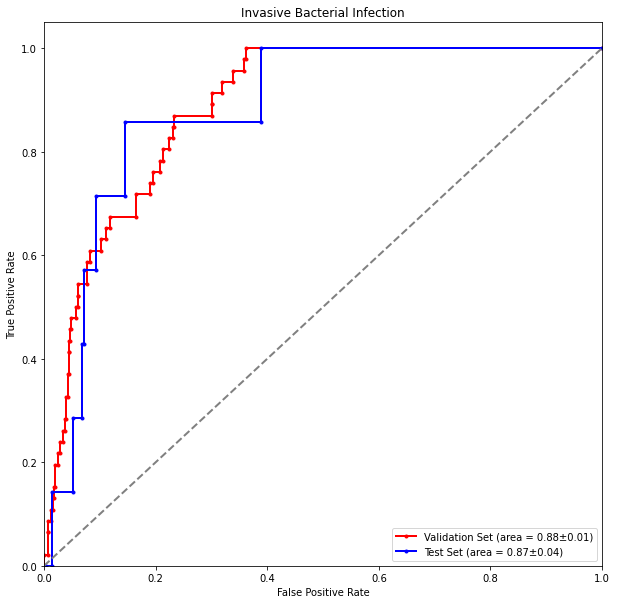

In [ ]:
# Plot ROC curve
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(val_fpr, val_tpr, color='red', marker='.', lw=2, label='Validation Set (area = {:0.2f}{}{})'.format(0.88, u"\u00B1", 0.01))
plt.plot(test_fpr, test_tpr, color='blue', marker='.', lw=2, label='Test Set (area = {:0.2f}{}{})'.format(0.87, u"\u00B1", 0.04))
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Invasive Bacterial Infection')
plt.legend(loc="lower right")
plt.show()